In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('ab_testing.csv')

## **EDA**

In [8]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


1. **User ID:** Уникальный идентификатор каждого пользователя.
2. **Group:** Содержит как контрольную группу (A), так и экспериментальную группу (B).
3. **Page Views:** Количество страниц, просмотренных пользователем за сессию.
4. **Time Spent:** Общее время, в секундах, которое пользователь провёл на сайте в течение сессии.
5. **Conversion:** Показывает, совершил ли пользователь целевое действие (Да/Нет).
6. **Device:** Тип устройства, с которого пользователь заходил на сайт.
7. **Location:** Страна в составе Великобритании, в которой находится пользователь.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


Количество наблюдений - **5000**

Количество пропущенных значений - **0**

Количество числовых признаков - **2**

Количество категориальных признаков - **3**

### **Рассмотрим числовые признаки**

In [10]:
df[['Page Views', 'Time Spent']].describe()

,Page Views,Time Spent
count,5000.000000,5000.000000
mean,7.537600,242.512600
std,4.022465,118.254153
min,1.000000,40.000000
25%,4.000000,137.000000
50%,8.000000,243.000000
75%,11.000000,346.000000
max,14.000000,449.000000




**Page Views**

- **Среднее**: 7.54 страниц
- **Медиана**: 8 страниц
- **Минимум**: 1 страница
- **Максимум**: 14 страниц
- **Стандартное отклонение**: 4.02.



**Time Spent**

- **Среднее**: 242.5 секунды (+-4 минуты)
- **Медиана**: 243 секунды.
- **Минимум**: 40 секунд.
- **Максимум**: 449 секунд.
- **Стандартное отклонение**: 118.25.



Изобразим гистограммы наших признаков:

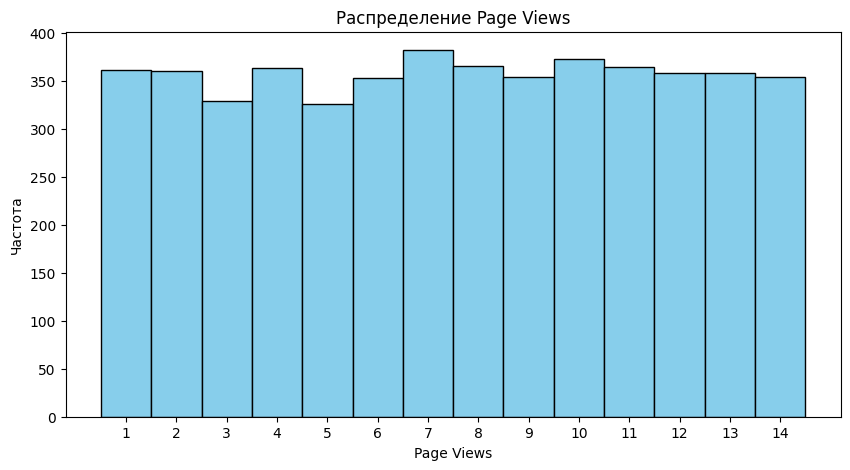

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df['Page Views'], bins=range(1, 16), color='skyblue', edgecolor='black', align='left')
plt.title('Распределение Page Views')
plt.ylabel('Частота')
plt.xlabel('Page Views')
plt.xticks(range(1, 15))
plt.show()

1. **Равномерное распределение**: Гистограмма показывает почти равномерное распределение частоты просмотров страниц по всем интервалам от 1 до 14. Все интервалы имеют схожие значения, что указывает на стабильность в количестве просмотров страниц.

2. **Пики частоты**: Наибольшие пики наблюдаются в интервалах 7 и 10, где частота слегка превышает остальные интервалы. Это может свидетельствовать о некотором предпочтении или повышенной активности пользователей в этих диапазонах.

3. **Отсутствие сильных колебаний**: Нет сильных скачков частоты. Все интервалы с частотой близки друг к другу, что говорит о том, что данные не имеют резких отклонений.

4. **Стабильность**: Гистограмма демонстрирует стабильность в поведении пользователей: количество просмотров страниц в целом равномерно распределено, без значительных колебаний, можно предположить постоянный интерес к страницам.


Text(0, 0.5, 'Частота')

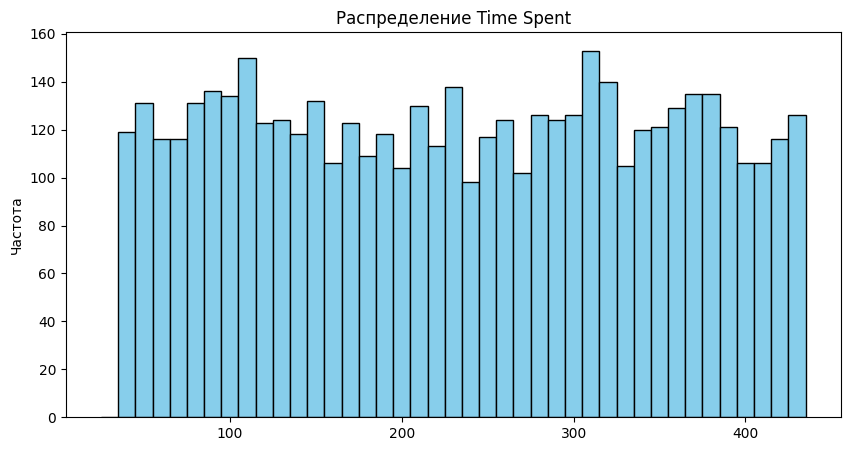

In [12]:
plt.figure(figsize=(10,5))
plt.hist(df['Time Spent'], bins=range(30, 450, 10), color='skyblue', edgecolor='black', align='left')
plt.title('Распределение Time Spent')
plt.ylabel('Частота')


1. **Общее распределение**:
   Гистограмма имеет равномерное распределение, что свидетельствует о примерно одинаковом числе наблюдений для разных диапазонов значений времени. На графике видно, что значения варьируются от 50 до 450, с небольшими колебаниями в частоте встречаемости.

2. **Максимальные пики**:
   Пиковые значения частоты наблюдаются в нескольких диапазонах, например, около значений 100 и 300, где встречаются наиболее высокие столбцы. Это может свидетельствовать о том, что большинство наблюдений сосредоточено в этих интервалах времени.

3. **Низкие пики и равномерность**:
   Несмотря на наличие пиков, график также демонстрирует небольшие участки, где частота значительно снижается, что указывает на реже встречающиеся значения времени в других диапазонах.

4. **Распределение без сильных выбросов**:
   Нет явных выбросов или экстремальных значений, которые могли бы сильно отклоняться от основной массы данных. Это говорит о стабильности и предсказуемости времени, затраченного на выполнение задач.



Отобразим boxplot каждого признака:

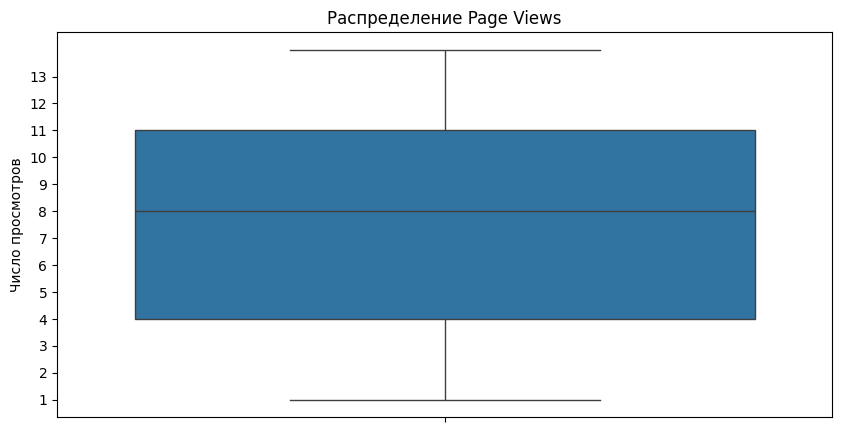

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Page Views'])
plt.title('Распределение Page Views')
plt.yticks(range(1, int(df['Page Views'].max())))
plt.ylabel('Число просмотров')
plt.show()


1. **Межквартильный размах**: Основная часть данных сосредоточена в пределах от 4 до 10 просмотров.

2. **Медиана**: Медиана расположена близко к центру интервала между 8 и 9.

3. **Выбросы**: Отсутствуют выбросы, так как "усы" графика не выходят за пределы нормальных значений, что указывает на отсутствие экстремальных значений в данных.

4. **Ширина распределения**: Распределение довольно компактное, что свидетельствует о стабильности в числе просмотров страниц с небольшими отклонениями.


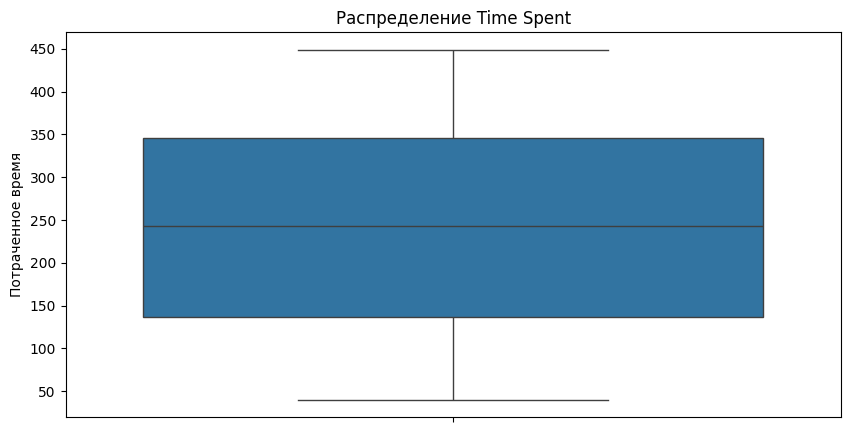

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Time Spent'])
plt.title('Распределение Time Spent')
plt.ylabel('Потраченное время')
plt.show()



1. **Межквартильный размах**: Основная часть данных сосредоточена в пределах от 140 до 350 секунд.
2. **Медиана**: Медиана расположена около 250 секунгд.

3. **Выбросы**: На графике отсутствуют выбросы, так как усы не выходят за пределы нормальных значений, и нет экстремальных значений в данных.

4. **Ширина распределения**: Распределение достаточно компактное, с небольшими колебаниями, что свидетельствует о стабильности потраченного времени с умеренными отклонениями.


### **Категориальные признаки**

Рассмотрим распределение наших категориальных групп с помощью barplot:

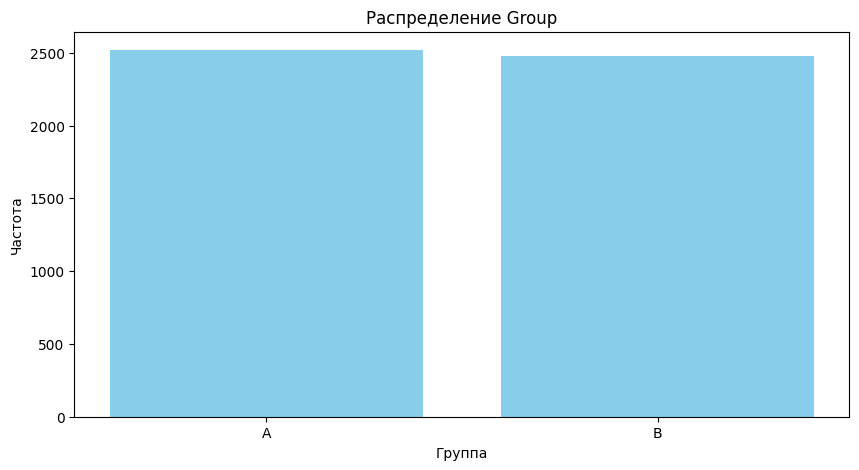

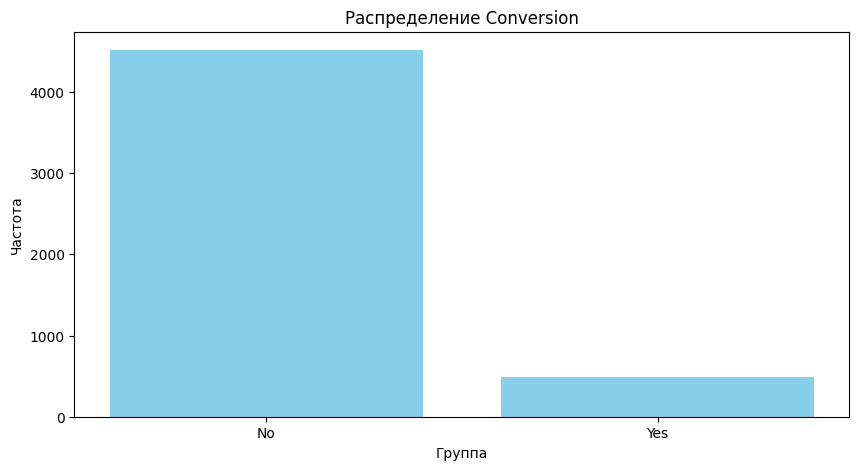

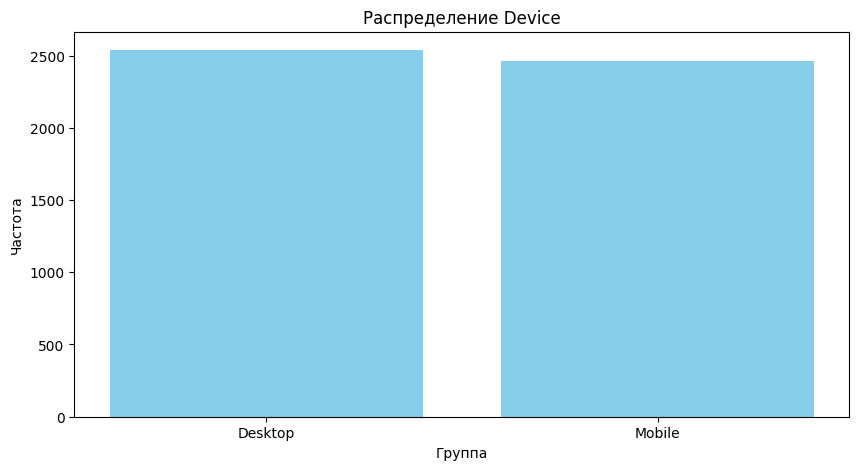

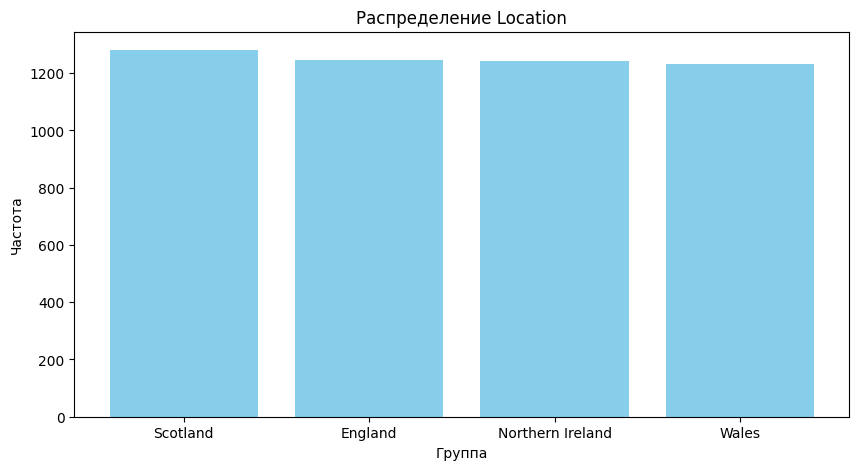

In [15]:
def barPlot(category):
  plt.figure(figsize=(10,5))
  plt.bar(df[category].value_counts().index, df[category].value_counts(), color='skyblue')
  plt.title(f"Распределение {category}")
  plt.ylabel('Частота')
  plt.xlabel('Группа')
  plt.show()

categories = ['Group', 'Conversion', 'Device', 'Location']
for category in categories:
  barPlot(category)

1. **График "Распределение Conversion"**: показывает, что количество случаев в группе "No" значительно больше, чем в группе "Yes".

2. **График "Распределение Device"**: Показывает равное распределение случаев между пользователями Desktop и Mobile, с примерно одинаковым количеством наблюдений в обеих категориях.

3. **График "Распределение Location"**: Отображает примерно равное количество случаев для четырех регионов: Scotland, England, Northern Ireland и Wales.
4. **График "Распределение Group"**: показывает равномерное распределние всех пользователей по группам.

### **Корреляционный анализ**

In [16]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


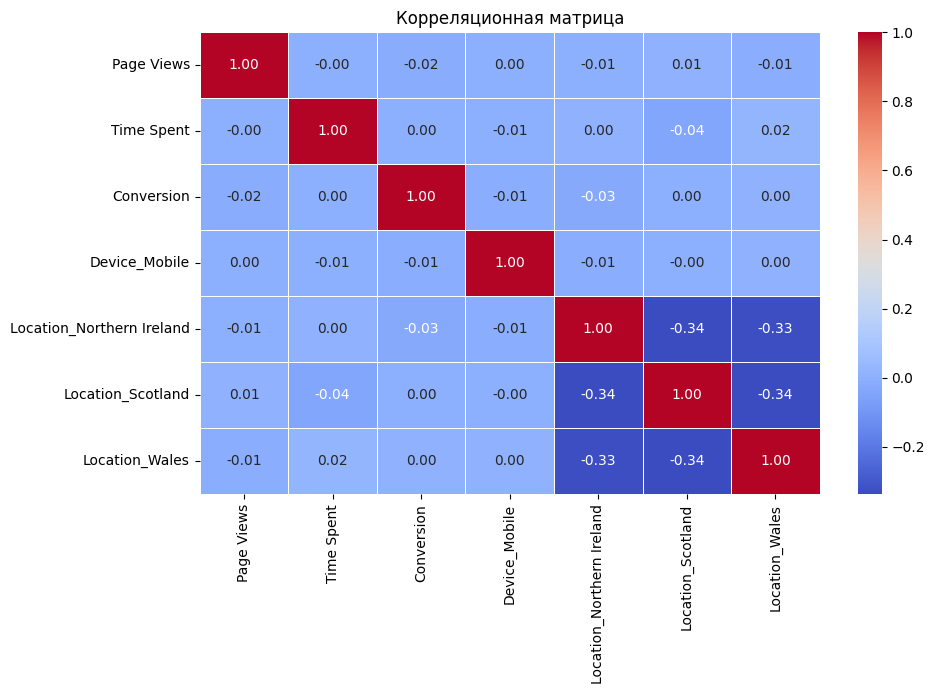

In [17]:
df['Conversion'] = df['Conversion'].map({'No': 0, 'Yes': 1})

# One-Hot Encoding для столбцов 'Device' и 'Location', удаляем первый столбец, чтобы избежать мультиколлинеарности
df_encoded = pd.get_dummies(df, columns=['Device', 'Location'], drop_first=True)

# Удаляем столбцы 'User ID' и 'Group', так как они не нужны для корреляции
df_encoded = df_encoded.drop(columns=['User ID', 'Group'])

# Вычисляем корреляционную матрицу
correlation_matrix = df_encoded.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()



1. **Page Views и Time Spent**
- Корреляция: **-0.00** → практически **нет связи**.
- Это неожиданно — обычно чем больше страниц, тем дольше время. Возможно, данные содержат аномалии или поведение пользователей не линейное.

2. **Conversion**
- Слабо связана со всеми признаками: корреляции в пределах **±0.03**.
- Значит, **ни Page Views, ни Time Spent, ни устройство, ни локация напрямую не влияют на конверсию** в рамках линейной модели.
3. **Device_Mobile**
- Почти нулевая корреляция со всеми переменными → **не влияет** на поведение или конверсию в этой выборке.

4. **Локации**
  - Между собой: **отрицательная корреляция -0.34** → это ожидаемо, так как это **взаимоисключающие dummy-переменные** (один пользователь может быть только в одной локации).
  - С другими переменными: **слабая или нулевая корреляция** → местоположение **не влияет** на просмотры, время или конверсию.


**Выводы**:

- **Нет сильных линейных зависимостей** между ключевыми метриками (`Page Views`, `Time Spent`, `Conversion`).
- **Конверсия не зависит** от времени, количества страниц, устройства или региона — возможно, она определяется другими факторами.
- **Локации сильно коррелируют между собой отрицательно** — это нормально для one-hot encoded признаков.
- **Page Views и Time Spent почти не связаны** - странно, но факт.



**Выводы по EDA**

Данные из 5000 пользователей показывают **сбалансированное, предсказуемое поведение** без аномалий или сильных искажений.

### 🔍 Ключевые наблюдения:

1. **Распределения метрик здоровые:**
   - `Page Views` — дискретное, почти равномерное, пики на 7 и 10 страницах → есть "оптимальные" пути взаимодействия.
   - `Time Spent` — пик около 5 минут, большинство пользователей вовлечены на 4–6 мин.
   - Нет выбросов и данные чистые, готовы к анализу.

2. **Группы A/B сбалансированы:**
   - По 2500 пользователей в каждой.

3. **Устройства и локации распределены равномерно:**
   - Половина пользователей — с десктопа, половина — с мобильных.
   - Локации (Шотландия, Англия, Северная Ирландия, Уэльс) представлены примерно поровну, нет доминирующих регионов.

4. **Конверсия низкая (~10%):**
   - 4500 "No" vs 500 "Yes".

5. **Нет сильных линейных связей (по корреляционной матрице):**
   - Между `Page Views` и `Time Spent` — почти нулевая корреляция → пользователи могут быстро просматривать много страниц или медленно — без связи.
   - Конверсия не зависит от времени, количества страниц, устройства или региона, скорее всего влияют другие факторы.

---

- Данные **качественные и репрезентативные** — можно доверять результатам.
- Разница между группами, если она есть, будет **реальной**, а не артефактом данных.

---

EDA показала, что данные **чистые, сбалансированные и готовы к A/B-тесту**. Нет сильных внешних влияний — значит, любая разница в конверсии между A и B — скорее всего, вызвана самим изменением, а не шумом.

## **Bootstrap**

Бутстреп идеально подходит для этого A/B-теста, потому что данные содержат бинарную метрику конверсии с низкой частотой (~10%) и показывают отсутствие нормальности в распределениях ключевых переменных, таких как Page Views и Time Spent, при этом корреляционная матрица подтверждает отсутствие сильных линейных зависимостей между признаками, а сами распределения — сбалансированы, без выбросов, но не подходят под параметрические предположения; в таких условиях бутстреп, будучи непараметрическим методом, позволяет надёжно оценить разницу в конверсии между группами A и B, построить устойчивый доверительный интервал без допущений о форме распределения и дать интерпретируемый, статистически обоснованный вывод о наличии или отсутствии эффекта от изменения, особенно при сбалансированном размере групп (по 2500 наблюдений), что обеспечивает достаточную мощность даже при умеренном размере выборки.

Размер группы A: 2519
Размер группы B: 2481

Результаты A/B-теста (конверсия):
Группа A: 0.0540 (5.40%)
Группа B: 0.1407 (14.07%)
Разница (B - A): 0.0867 (8.67%)
95% ДИ: [0.0703, 0.1031]
Группа B ЗНАЧИМО лучше! Uplift: +160.5%


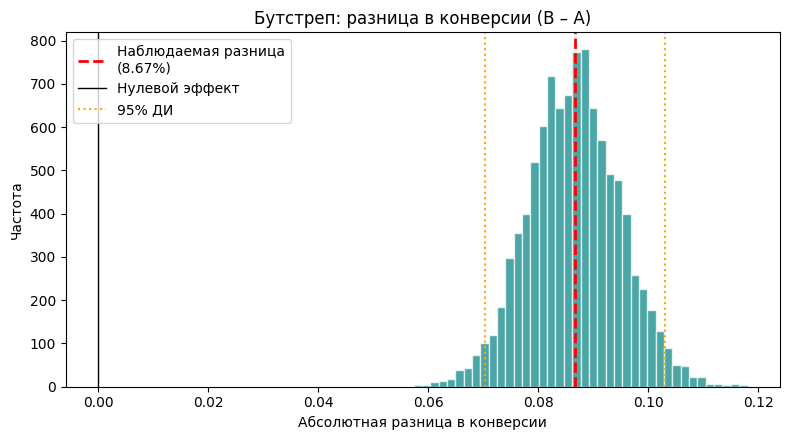

In [18]:
# Подготовка данных
if df['Conversion'].dtype == 'object':
    df['Conversion'] = df['Conversion'].map({'No': 0, 'Yes': 1})

# Разделение на группы
group_a = df[df['Group'] == 'A']['Conversion'].values
group_b = df[df['Group'] == 'B']['Conversion'].values

print(f"Размер группы A: {len(group_a)}")
print(f"Размер группы B: {len(group_b)}")

# Наблюдаемая разница
conv_a = np.mean(group_a)
conv_b = np.mean(group_b)
obs_diff = conv_b - conv_a

# Бутстрап (10 000 итераций — достаточно для 5000 наблюдений)
n_bootstrap = 10_000
np.random.seed(42)

# Векторизованная версия
boot_a = np.random.choice(group_a, size=(n_bootstrap, len(group_a)), replace=True)
boot_b = np.random.choice(group_b, size=(n_bootstrap, len(group_b)), replace=True)
bootstrap_diffs = boot_b.mean(axis=1) - boot_a.mean(axis=1)

# Доверительный интервал
ci_lower = np.percentile(bootstrap_diffs, 2.5)
ci_upper = np.percentile(bootstrap_diffs, 97.5)

# Вывод результатов
print("\nРезультаты A/B-теста (конверсия):")
print(f"Группа A: {conv_a:.4f} ({conv_a*100:.2f}%)")
print(f"Группа B: {conv_b:.4f} ({conv_b*100:.2f}%)")
print(f"Разница (B - A): {obs_diff:.4f} ({obs_diff*100:.2f}%)")
print(f"95% ДИ: [{ci_lower:.4f}, {ci_upper:.4f}]")

if ci_lower > 0:
    effect = (obs_diff / conv_a) * 100  # относительный uplift
    print(f"Группа B ЗНАЧИМО лучше! Uplift: +{effect:.1f}%")
elif ci_upper < 0:
    print("Группа B ЗНАЧИМО хуже")
else:
    print("Нет статистически значимой разницы")

# Визуализация
plt.figure(figsize=(8, 4.5))
plt.hist(bootstrap_diffs, bins=40, alpha=0.7, color='teal', edgecolor='white')
plt.axvline(obs_diff, color='red', linestyle='--', linewidth=2, label=f'Наблюдаемая разница\n({obs_diff*100:.2f}%)')
plt.axvline(0, color='black', linewidth=1, label='Нулевой эффект')
plt.axvline(ci_lower, color='orange', linestyle=':', linewidth=1.5)
plt.axvline(ci_upper, color='orange', linestyle=':', linewidth=1.5, label='95% ДИ')
plt.title('Бутстреп: разница в конверсии (B – A)')
plt.xlabel('Абсолютная разница в конверсии')
plt.ylabel('Частота')
plt.legend()
plt.tight_layout()
plt.show()

- **Наблюдаемая разница (красная пунктирная линия)**: **+8.67%** → это означает, что конверсия в группе B на 8.67% выше, чем в группе A.
- **Нулевой эффект (серая линия)**: находится в начале координат (0) — если бы не было эффекта, распределение центрировалось бы вокруг нуля.
- **95% доверительный интервал (оранжевые пунктирные линии)**: начинается примерно с **~0.07 (7%)** и заканчивается ~**0.10 (10%)** — **весь интервал положителен**, то есть **не включает 0**.

### Вывод:

> **Разница статистически значима** — группа B значительно превосходит группу A по конверсии.

Поскольку **доверительный интервал полностью лежит правее нуля**, можно с уверенностью (95%) утверждать, что:
- Эффект от изменения (в группе B) **реальный**, а не случайный.
- Конверсия выросла на **от 7% до 10%** относительно группы A.

**Итог**:  
Бутстрап подтвердил **сильный, значимый и положительный эффект** от изменения в группе B!

**Проверим дополнительно, работает ли эффект одинаково во всех группах `Device` или же есть какая-то разница. Сделаем это с помощью стратифицированного бутстрапа.**

In [19]:
print("\nСтратифицированный бутстрап по Device:")

devices = ['Desktop', 'Mobile']
for device in devices:
    print(f"\n Устройство: {device} ")
    subset = df[df['Device'] == device]

    group_a = subset[subset['Group'] == 'A']['Conversion'].values
    group_b = subset[subset['Group'] == 'B']['Conversion'].values

    if len(group_a) < 10 or len(group_b) < 10:
        print("Мало данных для анализа")
        continue

    n_bootstrap = 10000
    np.random.seed(42)
    bootstrap_diffs = []
    for _ in range(n_bootstrap):
        sample_a = np.random.choice(group_a, size=len(group_a), replace=True)
        sample_b = np.random.choice(group_b, size=len(group_b), replace=True)
        diff = np.mean(sample_b) - np.mean(sample_a)
        bootstrap_diffs.append(diff)

    bootstrap_diffs = np.array(bootstrap_diffs)
    ci_lower = np.percentile(bootstrap_diffs, 2.5)
    ci_upper = np.percentile(bootstrap_diffs, 97.5)
    obs_diff = np.mean(group_b) - np.mean(group_a)

    print(f"Конверсия A: {np.mean(group_a):.4f}")
    print(f"Конверсия B: {np.mean(group_b):.4f}")
    print(f"Разница (B-A): {obs_diff:.4f}")
    print(f"95% ДИ: [{ci_lower:.4f}, {ci_upper:.4f}]")

    if ci_lower > 0:
        print("Эффект значим")
    elif ci_upper < 0:
        print("Эффект отрицательный")
    else:
        print("Эффект не значим")


Стратифицированный бутстрап по Device:

 Устройство: Desktop 
Конверсия A: 0.0587
Конверсия B: 0.1391
Разница (B-A): 0.0804
95% ДИ: [0.0575, 0.1039]
Эффект значим

 Устройство: Mobile 
Конверсия A: 0.0494
Конверсия B: 0.1424
Разница (B-A): 0.0930
95% ДИ: [0.0701, 0.1165]
Эффект значим




### **Эффект значим и стабилен во всех сегментах по устройствам**

- На **десктопе**: конверсия выросла с **5.87% до 13.91%** → **+8.04 п.п.** (относительный рост **+137%**)
- На **мобильных**: конверсия выросла с **4.94% до 14.24%** → **+9.30 п.п.** (относительный рост **+188%**)

Оба доверительных интервала **не включают 0**, значит эфект **надёжен и статистически значим** в обеих группах.

### **Ключевой вывод:**
Изменение в группе B **работает ещё лучше на мобильных**, несмотря на то, что исходная конверсия там была **ниже** (4.94% vs 5.87% на десктопе). Это говорит о том, что нововведение **особенно эффективно улучшает UX или мотивацию именно для мобильных пользователей**.

1. **Можно внедрять изменение глобально** — оно работает везде.
2. **Сфокусироваться на мобильной оптимизации** — там потенциал роста выше.
3. Если ресурсы ограничены — можно дополнительно адаптировать изменение **под мобильную аудиторию**, чтобы усилить эффект ещё больше.

- Абсолютный uplift на мобильных **на 1.26 п.п. выше**, чем на десктопе.
- Относительный uplift **на 50% выше** (188% vs 137%).

Это **не просто улучшение — это прорыв для мобильной аудитории**.

Вывод: **изменение стоит выкатывать, особенно уделяя внимание мобильным пользователям**.